<a href="https://colab.research.google.com/github/denncraft/AI_ML_notes/blob/main/MINIS_fashion_recognizer_tutor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Помимо Hello World, пример компьютерного зрения

В предыдущем упражнении вы видели, как создать нейронную сеть, которая определит проблему, которую вы пытаетесь решить. Это дало явный пример усвоенного поведения. Конечно, в этом случае это было немного излишним, потому что было бы проще написать функцию Y=3x+1 напрямую, вместо того, чтобы использовать машинное обучение для изучения связи между X и Y для фиксированного набора значения и распространить это на все значения.

Но как насчет сценария, в котором написать такие правила гораздо сложнее — например, проблема компьютерного зрения? Давайте рассмотрим сценарий, в котором мы можем распознавать разные предметы одежды, обученные на основе набора данных, содержащего 10 различных типов.

## Начать кодирование

Давайте начнем с импорта TensorFlow.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


Мы научим нейронную сеть распознавать предметы одежды из общего набора данных под названием Fashion MNIST. Вы можете узнать больше об этом наборе данных [здесь](https://github.com/zalandoresearch/fashion-mnist).

Он содержит 70 000 предметов одежды в 10 различных категориях. Каждый предмет одежды представлен в виде изображения в оттенках серого размером 28x28. Некоторые примеры вы можете увидеть здесь:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Данные Fashion MNIST доступны непосредственно в API наборов данных tf.keras. Вы загружаете его так:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Вызов `load_data` для этого объекта даст вам два набора из двух списков, это будут значения обучения и тестирования для графики, содержащей предметы одежды и их этикетки.

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Как выглядят эти данные? Давайте распечатаем обучающее изображение и обучающую метку, чтобы увидеть... Поэкспериментируйте с различными индексами в массиве. Например, взгляните также на индекс 42... это другая загрузка, чем та, что находится под индексом 0.


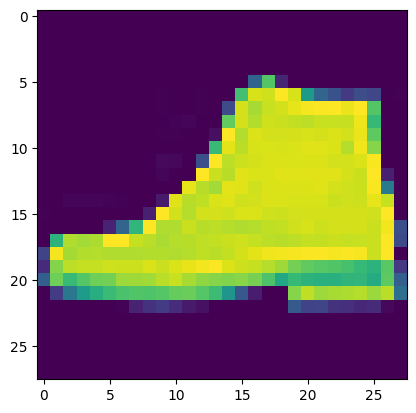

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
# print(training_labels[0])
# print(training_images[42])

Вы заметите, что все значения числа находятся в диапазоне от 0 до 255. Если мы обучаем нейронную сеть, по разным причинам проще рассматривать все значения как от 0 до 1, этот процесс называется `**нормализацией**`. и, к счастью, в Python такой список легко нормализовать без зацикливания. это делается так:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Теперь вам может быть интересно, почему существует два подхода... обучение и тестирование — помните, мы говорили об этом во вступлении? Идея состоит в том, чтобы иметь один набор данных для обучения, а затем другой набор данных... который модель еще не видела... чтобы увидеть, насколько хорошо он будет классифицировать значения. В конце концов, когда вы закончите, вам захочется опробовать его с данными, которых он раньше не видел!

Давайте теперь спроектируем модель. Здесь довольно много новых концепций, но не волнуйтесь, вы их освоите.

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

`**Sequential**`: Это определяет ПОСЛЕДОВАТЕЛЬНОСТЬ слоев в нейронной сети.

`**Flatten**`: Помните, раньше наши изображения были квадратными, когда вы их распечатывали? Flatten просто берет этот квадрат и превращает его в одномерный набор.

`**Dense**`: Добавляет слой нейронов

Каждому слою нейронов нужна `**функция активации**`, чтобы сообщать им, что делать. Вариантов много, но пока используйте только эти.

`**Relu**` по сути функция: `If X>0 return X, else return 0` -- поэтому она передает только значения 0 или выше на следующий уровень в сети.

`**Softmax**` принимает набор значений и фактически выбирает самое большое из них, например, если выходные данные последнего слоя выглядят так `[0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]`, это избавляет вас от необходимости ловить рыбу в поисках наибольшей ценности и превращает ее в `[0,0,0,0,1,0,0,0,0]` -- Цель — сэкономить много кода!

Следующее, что нужно сделать, когда модель определена, — это построить ее. Вы делаете это, компилируя его с помощью оптимизатора и функции потерь, как и раньше, а затем обучаете ее, вызывая `**model.fit**` и прося еe подогнать ваши обучающие данные под ваши обучающие метки, т. е. заставить ее выяснить взаимосвязь между данные обучения и их фактические метки, поэтому в будущем, если у вас будут данные, похожие на данные обучения, вы сможете спрогнозировать, как будут выглядеть эти данные.

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4946 - accuracy: 0.8258
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3737 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3374 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3134 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2932 - accuracy: 0.8927


После завершения обучения вы должны увидеть значение точности в конце последней эпохи. Это может выглядеть примерно так: 0,9098. Это говорит о том, что ваша нейронная сеть классифицирует обучающие данные с точностью около 91%. То есть она обнаружила совпадение шаблона между изображениями и метками, в 91% случаев. Неплохо, но не отлично, учитывая, что его обучали всего 5 эпох и делали довольно быстро.

Но как это будет работать с невидимыми данными? Вот почему у нас есть тестовые изображения. Мы можем вызвать model.evaluate и передать два набора, и он сообщит о потерях для каждого. Давайте попробуем:

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8767


[0.34848135709762573, 0.8766999840736389]

Для меня это дало точность около `0,8838`, что означает точность около `88%`. Как и ожидалось, он, вероятно, не будет так хорошо работать с невидимыми данными, как с данными, на которых он обучался! Проходя этот курс, вы найдете способы улучшить это.

Для дальнейшего изучения попробуйте выполнить следующие упражнения:

# Exploration Exercises

###Exercise 1:
Для этого первого упражнения запустите приведенный ниже код: он создает набор классификаций для каждого из тестовых изображений, а затем печатает первую запись в классификациях. Результатом после запуска является список чисел. Как вы думаете, почему это такой и что означают эти цифры?

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[6.5027948e-06 2.6407907e-08 8.6169268e-07 1.8363668e-09 8.6516714e-08
 4.5689261e-03 9.0056068e-07 1.8390188e-02 2.1909351e-07 9.7703230e-01]


Подсказка: попробуйте запустить print(test_labels[0]) — и вы получите 9. Поможет ли это вам понять, почему этот список выглядит именно так?

In [ ]:
print(test_labels[0])

9


### Что представляет собой этот список?

1. Это 10 случайных бессмысленных значений
2. Это первые 10 классификаций, созданных компьютером.
3. Это вероятность того, что этот предмет принадлежит к каждому из 10 классов.



####Ответ:

Правильный ответ: (3)

Результатом работы модели является список из 10 чисел. Эти числа представляют собой вероятность того, что классифицируемое значение является соответствующим значением, т.е. первое значение в списке — это вероятность того, что на кртинке избражен предмет класса «0», следующее — «1» и т. д. Обратите внимание, что у них всех ОЧЕНЬ НИЗКАЯ вероятность.

Для числа 9 вероятность составила 0,977+, т. е. нейронная сеть говорит нам, что это почти наверняка 9.

### Откуда вы знаете, что в этом списке указано, что это полуботинки?

1. Недостаточно информации, чтобы ответить на этот вопрос
2. 10-й элемент в списке — самый большой, а полуботинки как раз имеют маркировку 9.
3. Полуботинки имеют метку 9, а в списке 0->9 элементов.




####Ответ

Правильный ответ: (2). И список, и метки основаны на 0, поэтому полуботинки с меткой 9 означают, что это 10-й из 10 классов. Список, в котором 10-й элемент является самым высоким значением, означает, что нейронная сеть предсказала, что классифицируемый предмет, скорее всего, представляет собой полуботинки.

##Exercise 2:
Давайте теперь посмотрим на слои вашей модели. Поэкспериментируйте с разными значениями для плотного слоя с 512 нейронами. Какие разные результаты вы получаете по потерям, времени тренировок и т. д.? Как вы думаете, почему это так?



In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4740
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3575
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3223
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2976
Epoch 5/5
313/313 [==============================] - 1s 4ms/step
[5.1901190e-09 2.6591700e-08 9.0806623e-10 5.0891291e-10 2.6957652e-08
 6.8848964e-04 4.6094591e-08 2.0986207e-02 3.2233334e-08 9.7832513e-01]
9


###Question 1. Увеличив слой до 1024 нейронов. Какой получили эффект?

1. Обучение занимает больше времени, но является более точным
2. Обучение занимает больше времени, но не влияет на точность
3. Обучение занимает то же время, но более точное


####Ответ

Правильный ответ: (1) добавляя больше нейронов, нам придется выполнять больше вычислений, замедляя процесс, но в данном случае они оказывают хорошее влияние — мы становимся более точными. Это не означает, что всегда действует принцип «чем больше, тем лучше», вы можете очень быстро столкнуться с законом убывающей отдачи!

##Exercise 3:

Что произойдет, если вы удалите слой `Flatten()`. Как вы думаете, почему это так?

Вы получите ошибку о форме данных. Сейчас это может показаться расплывчатым, но оно подтверждает практическое правило, согласно которому первый уровень вашей сети должен иметь ту же форму, что и ваши данные. Сейчас наши данные представляют собой изображения размером `28x28`, а `28` слоев по `28` нейронов были бы невозможны, поэтому имеет смысл `сгладить` эти `28,28` до `784,1`. Вместо того, чтобы писать весь код для решения этой проблемы самостоятельно, мы добавляем слой `Flatten()` в начале, и когда массивы будут позже загружены в модель, они автоматически будут сведены для нас.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
# model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5270
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3960
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3592
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3323
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[8.9587038e-06 1.2841747e-09 7.3005191e-07 3.0512155e-08 4.6109977e-07
 1.6462712e-02 1.6761613e-05 2.9887065e-02 1.7817080e-04 9.5344502e-01]
9


##Exercise 4:

Рассмотрим конечные (выходные) слои. Почему их 10? Что бы произошло, если бы их было другоее количество, отличное от 10? Например, попробуйте обучить сеть с помощью 5

Вы получаете ошибку, как только обнаруживается неожиданное значение. Еще одно практическое правило: количество нейронов в последнем слое должно соответствовать количеству классов, которые вы классифицируете. В данном случае это цифры 0–9, значит, их 10, следовательно, в последнем слое у вас должно быть 10 нейронов.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5152
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3902
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3550
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3301
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.30494045e-05 7.95954975e-07 2.26712746e-06 3.37382153e-06
 9.15369674e-06 4.45543528e-02 2.56666699e-05 1.86583042e-01
 1.61150016e-03 7.67196834e-01]
9


##Exercise 5:

Рассмотрим влияние дополнительных слоев в сети. Что произойдет, если вы добавите еще один слой между слоем с 512 и последним слоем с 10.

Ответ: Значительного влияния не будет, потому что это относительно простые данные. Для гораздо более сложных данных (включая цветные изображения, которые можно классифицировать как цветы, которые вы увидите в следующем уроке) часто необходимы дополнительные слои.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.4695
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3555
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3228
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2972
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[8.8529202e-09 3.7512118e-07 1.2789728e-08 6.5310992e-08 3.5162531e-09
 8.7590236e-04 2.0936172e-08 4.2343322e-02 2.3876331e-07 9.5678002e-01]
9


#Exercise 6:

Рассмотрим влияние обучения на протяжении более или менее эпох. Почему вы думаете, что это будет так?

Попробуйте 15 эпох — вы, вероятно, получите модель с гораздо лучшими потерями, чем модель с 5. Попробуйте 30 эпох — вы можете увидеть, что значение потерь перестает уменьшаться, а иногда и увеличивается. Это побочный эффект так называемого `«переобучения»`, о котором вы могли слышать[где-то], и на него нужно обратить внимание при обучении нейронных сетей. Нет смысла тратить время на тренировки, если вы не улучшаете свои потери, верно! :)

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.15.0
Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5249
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3979
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3572
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3328
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3146
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2997
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2879
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2780
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2611
Epoch 11/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2531
Epoch 12/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0

#Exercise 7:

Перед обучением мы нормализовали данные, переходя от значений `0–255` к значениям `0–1`. Каковы будут последствия удаления этого? Вот полный код, чтобы попробовать. Как вы думаете, почему вы получаете разные результаты?

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 4.2391
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5416
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5092
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5075
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[8.3766068e-19 9.7198291e-16 2.4888497e-25 1.0654437e-15 4.0169880e-22
 5.9557132e-02 2.7447398e-26 6.0931470e-02 6.3304388e-12 8.7951136e-01]
9


#Exercise 8:

Ранее, когда мы готовились к дополнительным эпохам, у вас возникла проблема, из-за которой ваш 'loss' мог расти. Возможно, вам потребовалось некоторое время, чтобы дождаться завершения обучения, и вы могли подумать: «Было бы неплохо, если бы я мог остановить обучение, когда достигну желаемого значения?» - т.е. 95% точности может быть для вас достаточно, и если вы достигнете этого значения после 3 эпох, зачем сидеть и ждать, пока оно завершит гораздо больше эпох... Так как бы вы это исправили? Как и в любой другой программе... у вас есть обратные вызовы! Давайте посмотрим на них в действии...

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nДостигнута 90% точность, поэтому обучение остановлено!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])




2.15.0
Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4745 - accuracy: 0.8313
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3564 - accuracy: 0.8702
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3222 - accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2995 - accuracy: 0.8895
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2800 - accuracy: 0.8964
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.2659 - accuracy: 0.9020
Достигнуто 90% точночть, поэтому обучение остановлено!
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2658 - accuracy: 0.9021
